Lyrical Sentiment Analysis

In [57]:
!pip install gensim
!pip install nltk

In [58]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer, WordNetLemmatizer

import re

# Word2vec
from gensim.models import Word2Vec
import string

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /Users/sa26/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sa26/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sa26/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
# Load csv file
df = pd.read_csv('/Users/sa26/Documents/GitHub/Music-Recommendation-Algorithm/data/raw/train.csv')

In [60]:
lyrics = df['lyrics']
lyrics.head()

0    hold time feel break feel untrue convince spea...
1    believe drop rain fall grow believe darkest ni...
2    sweetheart send letter goodbye secret feel bet...
3    kiss lips want stroll charm mambo chacha merin...
4    till darling till matter know till dream live ...
Name: lyrics, dtype: object

In [61]:
pattern = re.compile(r'\bhate\b', re.IGNORECASE)

matching_rows = [row for row in lyrics if pattern.search(row)]

print(matching_rows)

['hahaha alright yeah alright even shoot complain things go want cliché life easy tough easy whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna thing dreamer think uncool preach better life learn school life live come life life easy tough life easy whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna things right need fighta life nicea elders polite hurt forget smile nation small good reward unite stand divide fall smile face greet life easy tough easy whatcha gonna whatcha gonna smile face world better place smile face whatcha gonna whatcha gonna smile face alright world better place smile face whatcha gonna whatcha gonna smile face yeah world better place smile face whatcha gonna whatcha gonna smile face smile world better place smile face yeah whatcha gonna w

In [62]:
pattern = re.compile(r'\blove\b', re.IGNORECASE)

love_rows = [row for row in lyrics if pattern.search(row)]

print(love_rows)


['watch world surround inside phone booth begin astound try couth say sunday cause rybody tellin truth monday yeah monday cause rybody drinkin vermouth lend hand kiss stand give away free acid joke smoke barely drive dusk headlights headphones tomorrow plan shop spree love hard like billboard grin toast life beauty head begin spin press cheek rainwashed streets weep reincarnation come december thirtyfirst worst time year think people like share beer have january explanations appear', 'wonderful time year kid jingle bell tell good cheer wonderful time year haphappiest season holiday greet meet friends come haphappiest season party host marshmallows toast carol snow scary ghost stories tales glory christmases long long wonderful time year mistletoeing hearts glow love ones near wonderful time year party host marshmallows toast carol snow scary ghost stories tales glory christmases long long wonderful time year mistletoeing hearts glow love ones near wonderful time wonderful time wonderfu

More love than hate!

In [63]:
# Create a word2vec model

w2v_toy = Word2Vec(sentences=lyrics)

In [64]:
# train the word2vec model

w2v_toy.train(lyrics, total_examples=len(lyrics), epochs=10)

(21431266, 126755060)

In [65]:
# word2vec removes infrequently used words, so unfortunately it only "learned" the meaning of a few words

w2v_toy.wv.key_to_index

{' ': 0,
 'e': 1,
 'a': 2,
 'o': 3,
 'i': 4,
 't': 5,
 'r': 6,
 'n': 7,
 'l': 8,
 's': 9,
 'h': 10,
 'd': 11,
 'c': 12,
 'g': 13,
 'm': 14,
 'u': 15,
 'y': 16,
 'k': 17,
 'w': 18,
 'b': 19,
 'p': 20,
 'f': 21,
 'v': 22,
 'z': 23,
 'j': 24,
 'x': 25,
 'q': 26,
 'é': 27,
 'í': 28,
 'ó': 29,
 'á': 30,
 'ñ': 31,
 'â': 32,
 'ا': 33,
 'ö': 34,
 'è': 35,
 'ي': 36,
 '지': 37,
 '어': 38,
 '我': 39,
 'و': 40,
 'ل': 41,
 'ä': 42,
 'の': 43,
 '抰': 44,
 'い': 45,
 'à': 46,
 '이': 47,
 '에': 48,
 '아': 49,
 'ê': 50,
 'م': 51,
 '리': 52,
 '你': 53,
 '면': 54,
 '的': 55,
 '가': 56,
 'ī': 57,
 'ら': 58,
 'ü': 59,
 'ك': 60,
 '서': 61,
 '버': 62,
 '마': 63,
 'る': 64,
 'も': 65,
 '다': 66,
 'å': 67,
 'な': 68,
 '들': 69,
 '해': 70,
 'ʼ': 71,
 'س': 72,
 '러': 73,
 'ب': 74,
 'か': 75,
 'ë': 76,
 '라': 77,
 'î': 78,
 'ر': 79,
 'ت': 80,
 'ï': 81,
 'ن': 82,
 '길': 83,
 '는': 84,
 'に': 85,
 '有': 86,
 '하': 87,
 'た': 88,
 '만': 89,
 'ま': 90,
 'で': 91,
 '나': 92,
 '스': 93,
 'د': 94,
 'ع': 95,
 'ف': 96,
 'し': 97,
 '대': 98,
 'を': 99,
 '잊': 100,

In [66]:
# let's contextualize this! What are the most similar words to "e"

w2v_toy.wv.most_similar("e")[0]

('v', 0.6134018898010254)

In [67]:
# get a sample of 5 random lyrics

lyrics.sample(5)

11576    realize bring table till go coffee table cat h...
23363    separation break break split inside masquerade...
16817    head turn burn head turn burn sparkle eye keep...
1999     hard time wake morning things mind like friend...
11092    hole head hole head need like like hole head n...
Name: lyrics, dtype: object

In [68]:
# create a train,test split

df_train, df_test = train_test_split(lyrics, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 22689
TEST size: 5673


In [70]:
# tokenize your data

sentences = [t.split() for t in df_train] 

In [71]:
sentences

[['right',
  'wrong',
  'go',
  'blame',
  'lie',
  'cry',
  'die',
  'inside',
  'step',
  'step',
  'night',
  'night',
  'walk',
  'floor',
  'morning',
  'light',
  'leave',
  'word',
  'haunt',
  'mind',
  'fool',
  'goodbye',
  'time',
  'time',
  'warn',
  'sign',
  'beat',
  'heart',
  'keep',
  'tell',
  'hurt',
  'know',
  'cause',
  'leave'],
 ['white',
  'fairweather',
  'dream',
  'look',
  'different',
  'eye',
  'space',
  'time',
  'survive',
  'change',
  'time',
  'take',
  'life',
  'burn',
  'hearts',
  'afire',
  'desire',
  'change',
  'spirit',
  'world',
  'alive',
  'spirit',
  'world',
  'overdrive',
  'step',
  'dance',
  'step',
  'dance',
  'life',
  'ride',
  'rhythm',
  'spirit',
  'rise',
  'believe',
  'feel',
  'live',
  'future',
  'dream',
  'open',
  'eye',
  'technology',
  'direction',
  'spirit',
  'world',
  'alive',
  'spirit',
  'world',
  'overdrive',
  'step',
  'dance',
  'step',
  'dance',
  'life',
  'ride',
  'rhythm',
  'spirit',
  'ris

In [72]:
# create a word2vec model

w2v_model = Word2Vec()
w2v_model.build_vocab(sentences)

In [73]:
# take a look at the INITIAL vocab words that it discovered

w2v_model.wv.key_to_index

{'know': 0,
 'like': 1,
 'time': 2,
 'come': 3,
 'feel': 4,
 'heart': 5,
 'go': 6,
 'yeah': 7,
 'away': 8,
 'life': 9,
 'want': 10,
 'cause': 11,
 'baby': 12,
 'right': 13,
 'leave': 14,
 'live': 15,
 'tell': 16,
 'night': 17,
 'think': 18,
 'world': 19,
 'need': 20,
 'gonna': 21,
 'long': 22,
 'look': 23,
 'good': 24,
 'break': 25,
 'hold': 26,
 'hear': 27,
 'fall': 28,
 'mind': 29,
 'dream': 30,
 'say': 31,
 'hand': 32,
 'wanna': 33,
 'home': 34,
 'eye': 35,
 'little': 36,
 'better': 37,
 'play': 38,
 'lose': 39,
 'walk': 40,
 'fuck': 41,
 'believe': 42,
 'girl': 43,
 'stay': 44,
 'stand': 45,
 'turn': 46,
 'change': 47,
 'head': 48,
 'sing': 49,
 'things': 50,
 'take': 51,
 'start': 52,
 'face': 53,
 'blue': 54,
 'tear': 55,
 'money': 56,
 'tonight': 57,
 'inside': 58,
 'place': 59,
 'people': 60,
 'light': 61,
 'bring': 62,
 'song': 63,
 'shit': 64,
 'word': 65,
 'love': 66,
 'sweet': 67,
 'hard': 68,
 'true': 69,
 'stop': 70,
 'black': 71,
 'gotta': 72,
 'remember': 73,
 'give': 7

In [74]:
# let's train our mdoel

w2v_model.train(sentences, total_examples=len(sentences), epochs=10)

(14078473, 16542910)

In [75]:
# let's take a look at the vector we trained for the word 'bounce'

w2v_model.wv["bounce"]

array([ 1.5932512e-01, -1.6868985e-01, -6.7780513e-01,  1.8295625e-01,
       -1.7264841e+00, -4.7892815e-01,  9.9853456e-01,  1.0440208e+00,
       -7.1039629e-01, -1.3722776e+00, -2.4591665e-01,  4.7634611e-01,
       -2.0161356e-01,  2.4472122e+00,  5.8103377e-01,  5.3154075e-01,
       -3.3643812e-01,  8.9710516e-01,  1.2084012e+00, -1.8821307e-01,
        5.5528361e-01, -7.2537005e-01,  1.1845696e+00, -6.6923738e-01,
       -1.3680024e+00, -5.0492096e-01, -1.3108282e-01,  2.0040533e-01,
       -3.6945757e-01,  8.9817017e-01,  3.0187887e-01,  7.4788585e-02,
        7.3087782e-01, -1.1511348e+00,  1.5899813e+00, -1.0708975e+00,
        7.0266619e-02,  5.8213282e-02, -1.4063145e+00,  7.1096492e-01,
       -2.2392061e-01, -2.5492546e-01, -8.4177297e-01,  9.0390366e-01,
        4.8904911e-01, -2.9148656e-01,  1.0175618e+00, -1.4633255e-01,
        8.6950773e-01,  1.5389369e-01,  1.5983478e-03,  5.1460212e-01,
        8.7894017e-01, -1.8932203e+00,  4.4975388e-01, -4.3650564e-02,
      

In [76]:
# as we've established already, this does not give us too much info, let's take a look at the MOST similair words

w2v_model.wv.most_similar("bounce")

[('bouncy', 0.6219010949134827),
 ('jersey', 0.6059246063232422),
 ('snap', 0.6051724553108215),
 ('bouncin', 0.6051075458526611),
 ('jumpin', 0.5783289074897766),
 ('bump', 0.5618752837181091),
 ('thong', 0.5549384951591492),
 ('dunk', 0.5519948601722717),
 ('wiggle', 0.5515483617782593),
 ('rubber', 0.5502651929855347)]

In [77]:
# finally, let's apply some PCA to each word in our model in order to reduce these values into a comprehensible visualization
# NOTE: we limit this to 50 words so that this doesn't take all night to run

words = list(w2v_model.wv.key_to_index.keys())[:50] 
word_vectors = [w2v_model.wv[word] for word in words]

word_vectors

[array([ 0.5883846 , -0.35992765,  0.49555776, -0.46238226,  0.06943011,
         0.08698425, -0.00638615, -0.3629284 , -0.5477067 ,  0.21711503,
         0.6386517 ,  1.0368485 , -0.5244212 ,  0.06245744,  0.4759329 ,
         0.38023156,  1.1534191 ,  1.2730236 , -1.0688146 , -1.4983922 ,
        -0.689825  ,  0.00359493,  0.09300097,  0.67128915,  0.17837167,
         0.34480208, -0.40823373,  0.37107   ,  0.01782066,  0.25382143,
        -0.30107328,  0.39570725, -0.15206873, -0.18521419, -0.7278211 ,
        -1.7878791 ,  0.05696499, -0.21941   , -0.36039406, -0.16632709,
        -0.00307512,  0.08664735, -0.16186553, -0.41001952,  0.63503635,
        -1.4130468 ,  0.42002177, -0.20213242, -0.6081942 , -0.8490579 ,
        -1.9509181 , -0.27036953,  0.7668251 , -0.51355195,  0.49723867,
         0.11113445,  0.45114774, -0.10738894,  1.3375291 ,  0.09573321,
         0.14149076, -0.8143242 ,  1.8075496 , -0.10382506, -0.27686945,
         1.4193146 ,  0.30112898,  0.0520221 , -0.8

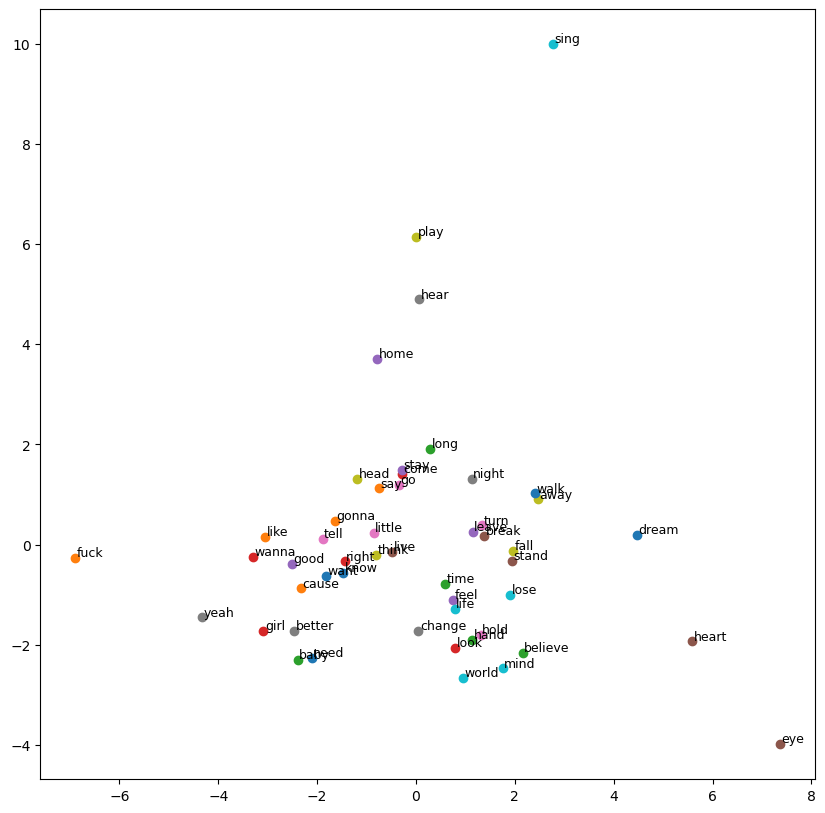

In [78]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 10))
for i, word in enumerate(words):
    plt.scatter(pca_vectors[i, 0], pca_vectors[i, 1])
    plt.text(pca_vectors[i, 0]+0.03, pca_vectors[i, 1]+0.03, word, fontsize=9)
plt.show()